In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


In [2]:
stud = pd.read_csv('stud_math.xls')

In [3]:
'''Здесь планирую описывать функции'''

# функция, которая "вгоняет" данные в необходимый диапазон и заменяет выбросы на актуальные данные
# Применима к столбцам Fedu и famrel, где согласно наблюдениям ошибочные данные.
def fun_inrange(df, col, minn, maxx):
    for i in range(len(df)):
        if df[col][i] > maxx:
            df[col][i] = maxx
        elif df[col][i] < minn:
            df[col][i] = minn
    return df[col]

# Функция по поиску интерквартильного расстояния
def fun_IQR(df,loc):
    perc25 = df[loc].quantile(0.25)
    perc75 = df[loc].quantile(0.75)
    IQR = perc75 - perc25

    return print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),
                 "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# Функция, которая строит графики boxplot для наблюдения влияния значений категориальных признаков на score. 
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy = 'omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Создадим списки числовых и нечисловых (категориальных признаков)
stud_num = stud.select_dtypes(include=[np.number])
num_cols = stud_num.columns 

stud_non_num = stud.select_dtypes(exclude=[np.number])
non_num_cols = stud_non_num.columns.values


Исходя из описания файла, вот какие признаки мы имеем в нашем файле:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Посмотрим на данные подробнее

In [104]:
display(stud)
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Беглый анализ.

Мы видим 30 столбцов (признаков) и 395 строк.

Есть категориальные признаки (object), есть числовые (float64, int64)

Почти в каждом столбце есть пропуски, кроме первых трех

Попробуем вызвать метод .describe() для более детального анализа числовых столбцов

In [105]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В числовых столбцах мы видим следующее: 
1. В столбце 'Fedu' max = 40, этого быть не должно, по условиям max = 4, видимо механически случайно 0 дописали
2. В столбце 'famrel' min = -1, ошибка - диапазон начинается от 1
3. Столбец 'studytime, granular' в принципе не нужен. Он имеет схожее название с studytime, причем значения ячеек равны значениям studytime, умноженным на (-3). Удаляем именно его, потому что во-первых он имеет отрицательные значения, не хотелось бы, чтоб это как-то влияло и отвлекало, а во-втрых название говорит, что именно studytime основной признак, а этот создан искусственно.
4. Судя по всему, в столбце 'absences' что-то неладное, возможно выбросы, слишком большой max

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
None


<AxesSubplot:>

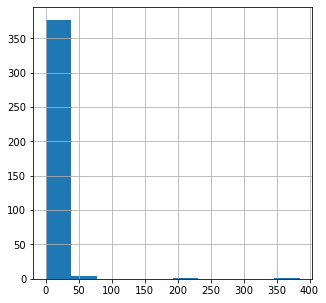

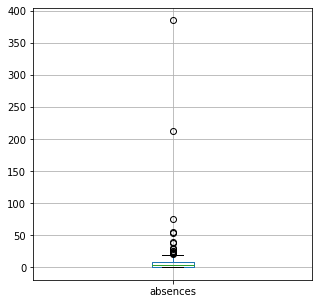

In [106]:
print(stud.absences.value_counts())
print(fun_IQR(stud,'absences'))

plt.figure(figsize=(5,5))
stud.absences.hist()
plt.figure(figsize=(5,5))
stud.boxplot(column='absences')


В столбце absences данные, встречающиеся хотя бы 2 раза и более лежат в диапазоне от 0 до 22 и это почти 96% данных из этого столбца, остальные значения (16 из 383) выбиваются из набора, но считать их выбросами и удалять или заменять ничего не будем, потому что в данном признаке не был оговорен "правильный" диапазон, возможно эти данные нужны для дальнейшего анализа.

Построим графики pairplot для нашего датафрейма для корреляционного анализа данных.

Также построим отдельно корреляционную матрицу.

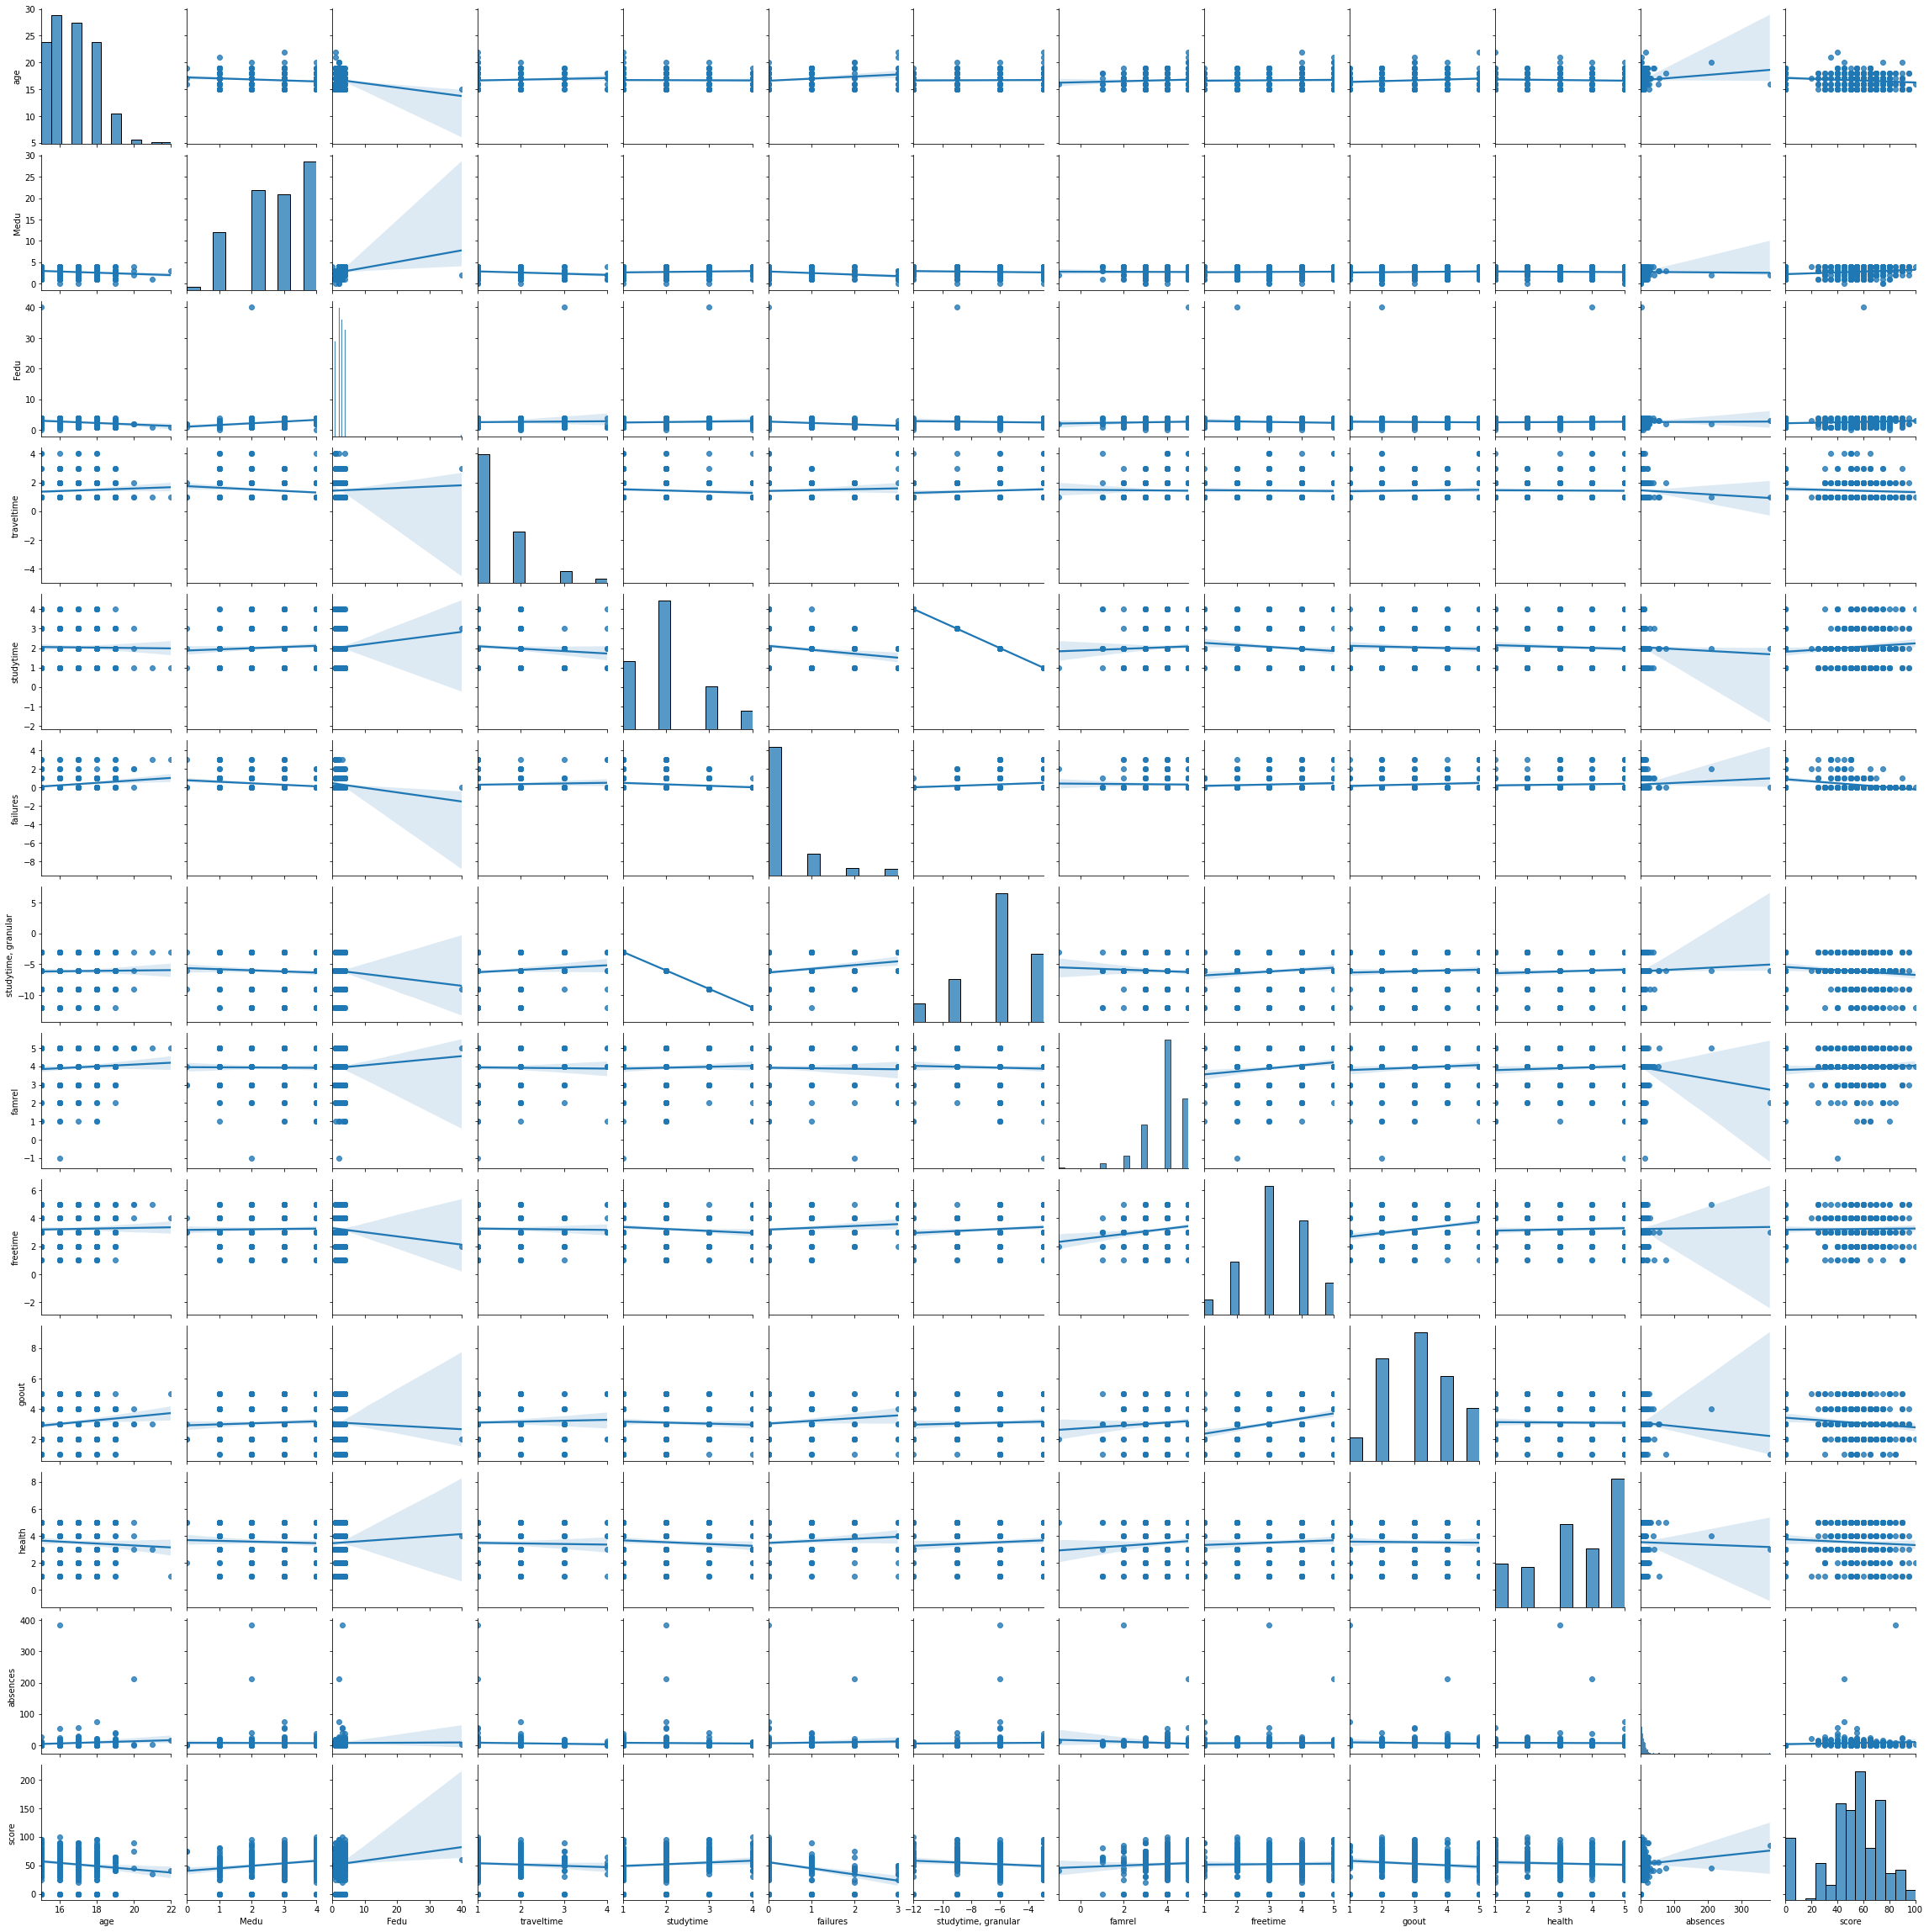

In [107]:
sns.pairplot(stud, kind = 'reg')

Fedu и Medu в какой-то мере скореллированны между собой и с итоговой оценкой. Тренды идут вверх.
Studytime, traveltime - по разному действуют на score

Health, goout, failures, Fedu, Medu, Age так или иначе влияют на итоговую оценку.

Посмотрим на корреляционную матрицу

In [108]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Наиболее скоррелированы со score столбцы Medu и failures.

Наименее скоррелированы со score столбцы freetime, famrel, absences, health, traveltime, Fedu

Также мы подтверждаем корреляцию между studytime и studytime, granular

Построим Боксплоты - графики для наблюдения влияния значений категориальных признаков на итоговую оценку

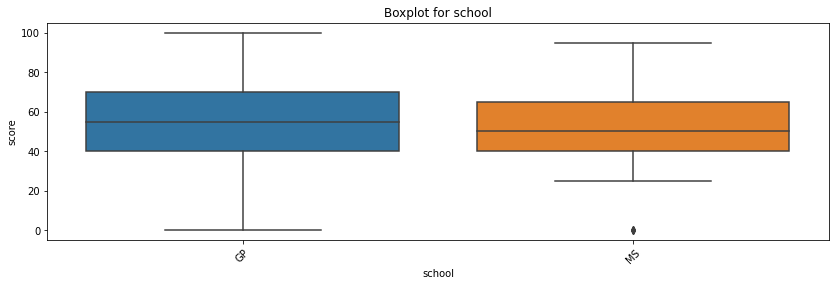

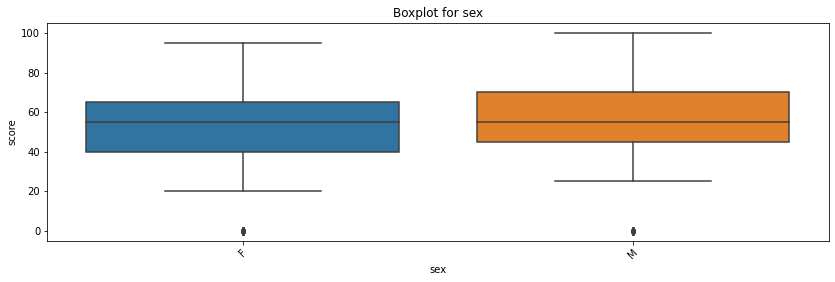

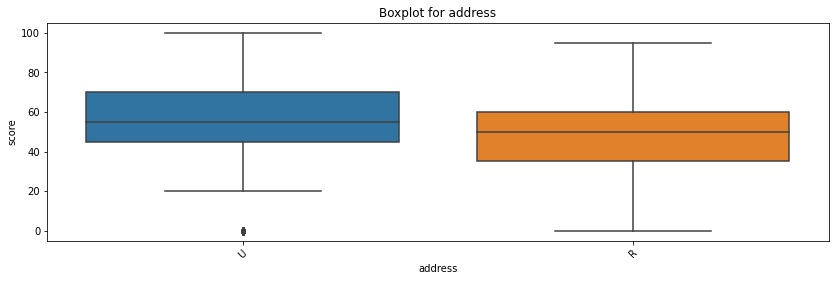

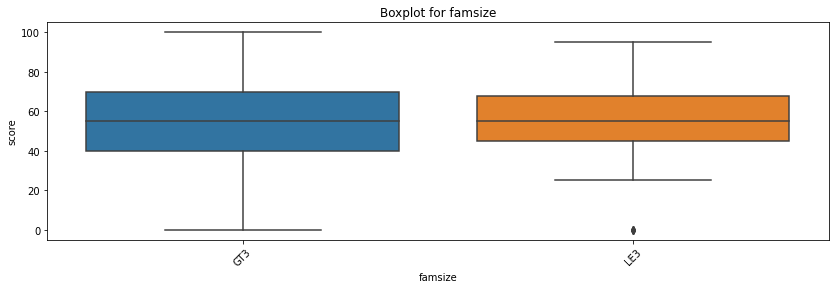

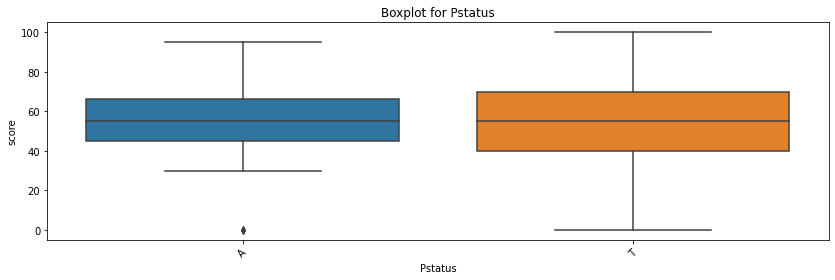

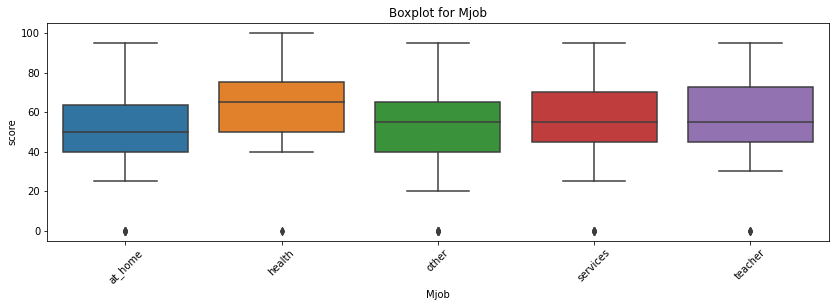

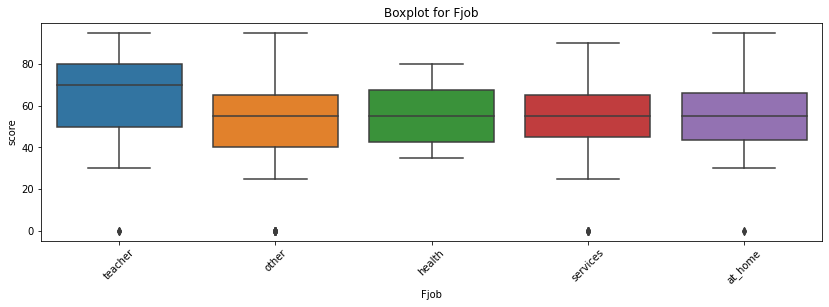

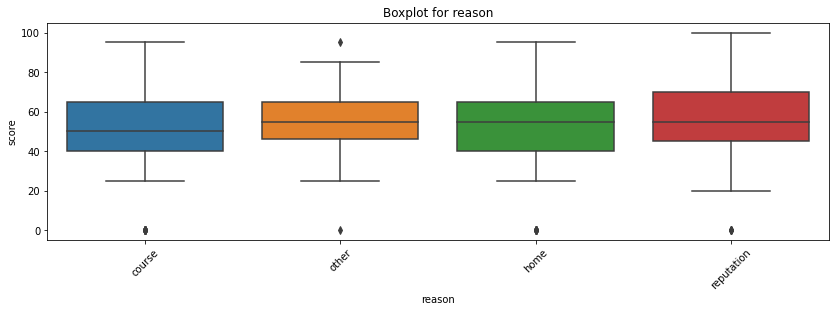

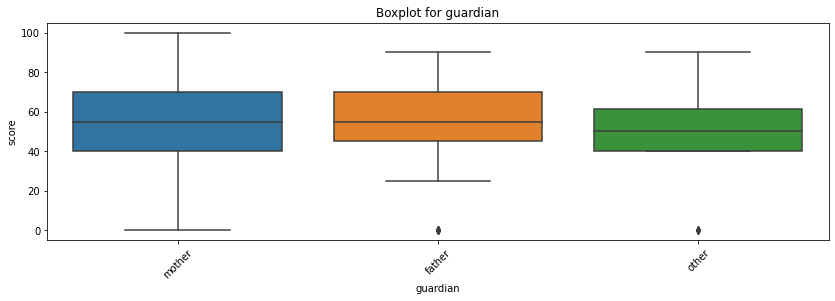

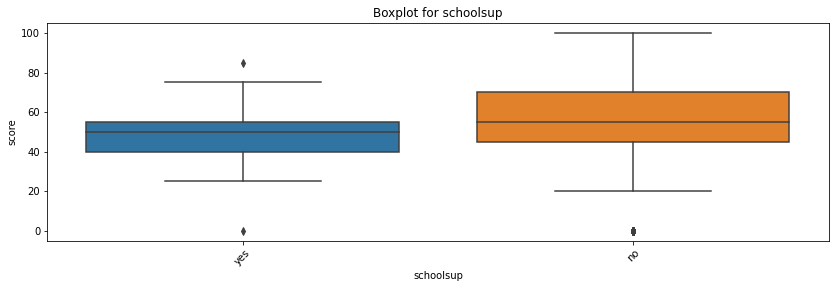

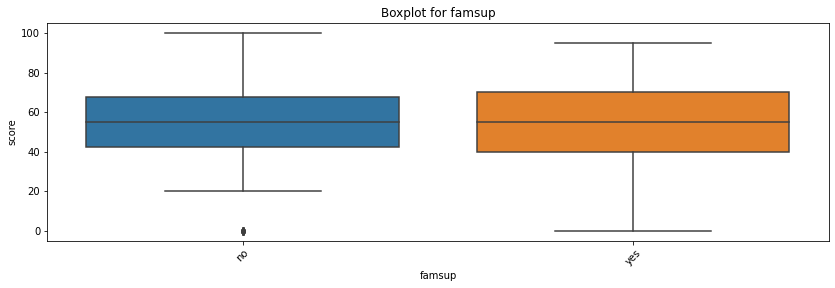

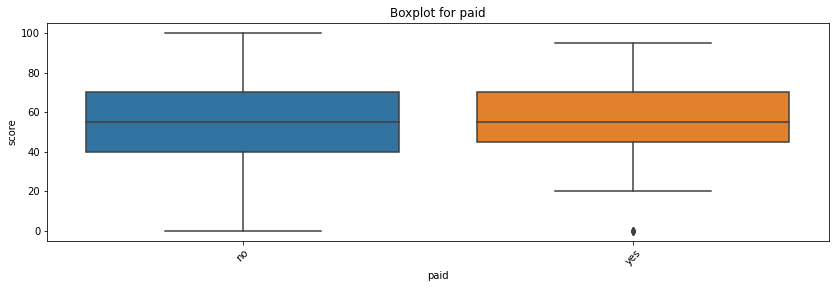

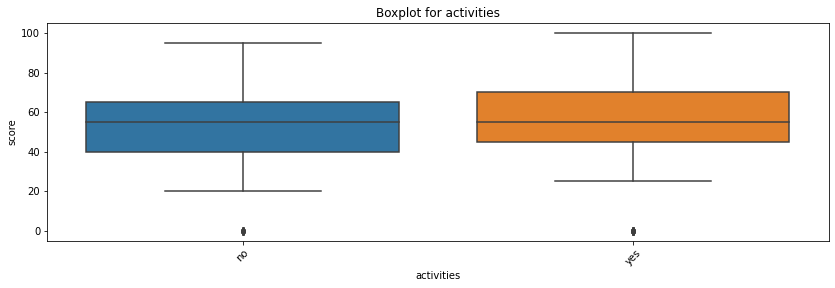

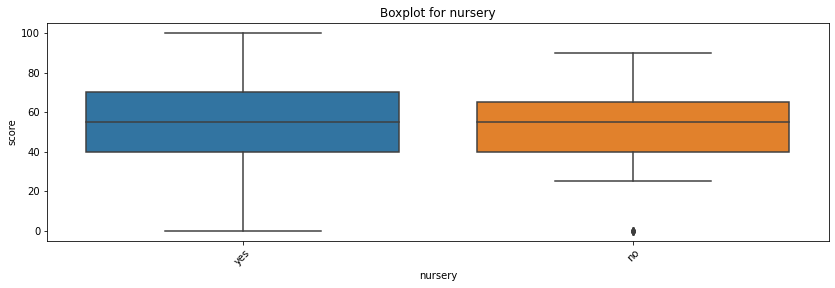

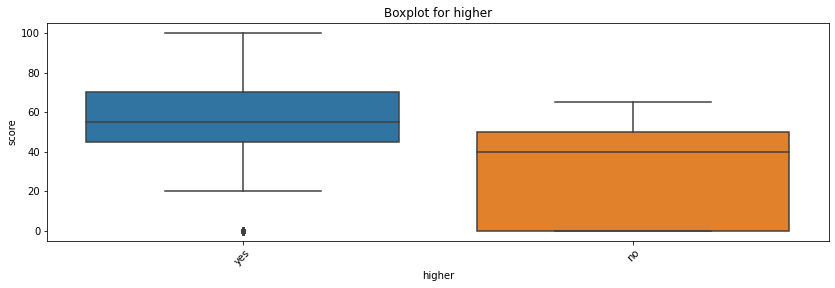

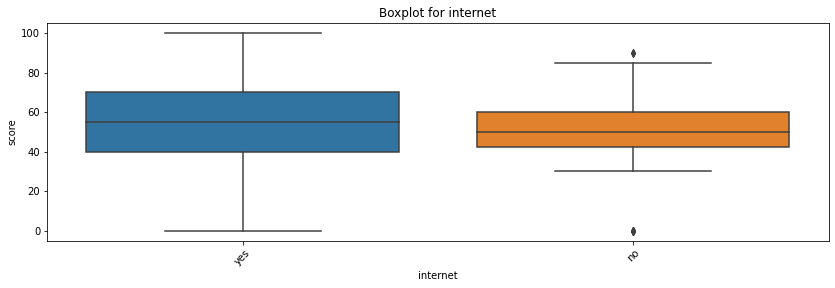

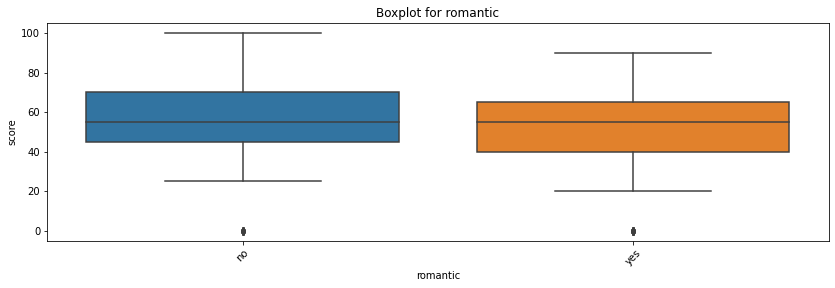

In [4]:
for col in non_num_cols:
    get_boxplot(col)

Выводы по этим графикам:
1. School. У студентов школы MS в целом более компактное распределение оценок и вцелом оценки выше, хотя максимальное значение немного ниже, чем у студентов школы GP. Замечаем и выброс. 
2. Sex - практически не влияющий на score признак
3. address. Студенты со значением U (городской) имеют более высокие оценки по всем контрольным точкам (минимум, максимум, квартили). Также, замечаем выбросы.
4. famsize. Примерно одинаковое медианное значение, чуть более компактное распределение в семьях менее чем из 3 человек. Есть выбросы.
5. Pstatus. Примерно одинаковое медианное значение, чуть более компактное распределение в семьях со статусом А (родители живут раздельно). Есть выбросы. Похоже, что признаки famsize и Pstatus как-то скорелированны между собой.
6. Mjob выбивается профессия health, остальные плюс минус похожи.
7. Fjob выбивается профессия teacher, остальные похожи между собой еще больше.
8. reason. Похоже, что данный признак напрямую также не сильно влияет на score. Все значения этого признака примерно в одном диапазоне оценок.
9. guardian. Разные значения дают разное распределение. Если опекун - мать, то разброс оценок наибольший. Возможно, что таких значений просто больше по количеству. Нужно проверить на количество появлений того или иного значения признака. Есть выбросы при других значениях.
10. schoolsup. достаточно по-разному влияют значения этого признака на итоговую оценку. При этом странно, что те, кто получают дополнительную образовательную поддержку - получают оценки ниже.
11. famsup. Менее влиятельный признак, чем предыдущий. Но также, те кто не получает образовательную поддержку в семье - в итоге реже получают низкие оценки.
12. paid. Тенденция "странности" сохраняется. Те, кто получают платные курсы по математике - более компактное распределение в сторону высоких оценок. Но медианное значение, верхний и нижний квартили плюс/минус похожи, а максимальное значение и того ниже.
13. activities. Похоже, что данный признак также не особо влияет на score.
14. nursery. Больший разброс по оценкам показвают те студенты, которые посещали детский сад. Хотя опять же, возможно таких студентов было просто больше.
15. higher. Желание получить высшее образование определенно влияет на оценку score.
16. internet. Наличие интернета скорее всего показывает такое распределение, потому что в основном он есть у большинства. Соответственно влияние на score, скорее всего, незначительное. 
17. romantic. Наличие романтических отношений, похоже, немного снижает успеваемость.

Посчитаем, сколько уникальных значений в разных категориальных признаках.

In [110]:
for col in non_num_cols:
    display(pd.DataFrame(stud[col].value_counts()))

,school
GP,349
MS,46


,sex
F,208
M,187


,address
U,295
R,83


,famsize
GT3,261
LE3,107


,Pstatus
T,314
A,36


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34


,guardian
mother,250
father,86
other,28


,schoolsup
no,335
yes,51


,famsup
yes,219
no,137


,paid
no,200
yes,155


,activities
yes,195
no,186


,nursery
yes,300
no,79


,higher
yes,356
no,19


,internet
yes,305
no,56


,romantic
no,240
yes,124


Выводы.
Подсчет количества значений для того или иного признака дал понять, что: 
1. Признаки, в которых есть подавляющее количество одного из значений дают больший разброс оценок.
2. Некоторые признаки (например sex или activities), где распределение значений примерно поровну и boxplot нам показыал примерно одинаковое распределение - не влияют на score. Такие признаки менее значимы.
3. Признак paid довольно странный. Мы видим достаточно большое количество студентов, которые занимаются платно математикой, но медианное значение, верхний и нижний квартили схожи с оценками тех, кто не занимается, максимальный бал не попадает в диапазон. Единственный показатель, который превосходит тех, кто не занимается - это меньше низких оценок.

In [111]:
for col in non_num_cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Получили несколько признаков, которые влияют на оценку score.

На данном этапе, мы сделали следующее:

1. Прочитали файл, описали его признаки
2. Посмотрели на наличие пропусков и аномалий
3. Построили корреляционную матрицу и графики pairplot, чтобы увидеть как влияют числовые признаки на итоговую оценку score
4. Построии графики boxplot, чтобы увидеть как категориальные признаки влияют на итоговую оценку score
5. Посмотрели как распределены количественно значения категориальных признаков.
6. Провели тест студента для категориальных признаков.

Далее займемся очисткой и форматированием данных

In [112]:
stud['Fedu'] = fun_inrange(stud, 'Fedu', minn=0, maxx=4) # привели данные в столбце к необходимому диапазону
stud['famrel'] = fun_inrange(stud, 'famrel', minn=1, maxx=5) # привели данные в столбце к необходимому диапазону

<ipython-input-103-309870a0f50c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = maxx
<ipython-input-103-309870a0f50c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = minn


In [113]:
# Посмотрим, как преобразовались данные
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.517520,1.438692,2.038660,0.337802,-6.115979,3.942935,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,1.088808,0.694181,0.842078,0.743135,2.526235,0.903824,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Данные начинают преобразовываться, столбцы 'Fedu' и 'famrel' откорректированны, 'studytime, granular' удален.

Теперь разберемся с пропусками.

Из .info() мы видели, что они есть почти везде, визуализируем это и посмотрим в каком количестве пропуски содеражаться в тех или иных столбцах.

<AxesSubplot:>

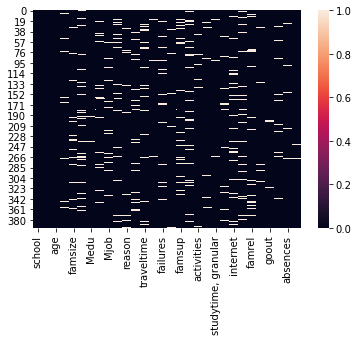

In [114]:
# Вариант 1 - с помощью тепловой карты
sns.heatmap(stud.isnull())

In [115]:
# Определяем наличие пустых значений для всех переменных. 
# Вариант 2 - процентный список
for col in stud.columns:
    pct_missing = np.mean(stud[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
studytime, granular - 2%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


Теперь необходимо эти пропуски заполнить. Кроме предсказываемой величины - 'score'.

Пропуски в числовых признаках планирую заполнять медианным значением.

Пропуски в категориальных признаках планирую заполнять значением моды - наиболее часто встречающегося значения для столбца.

In [116]:
# Для каждого столбца из списка числовых признаков поищем пустые значения и посчитаем сколько их
num_cols = stud_num.columns
for col in num_cols[0:-1]: # кроме последнего - 'score'
    missing = stud[col].isnull()
    num_missing = np.sum(missing)
    print(num_missing,col)

0 age
3 Medu
24 Fedu
28 traveltime
7 studytime
22 failures
7 studytime, granular
27 famrel
11 freetime
8 goout
15 health
12 absences


In [117]:
# Заполним пропуски в числовых признаках: 
for col in num_cols[0:-1]: # кроме последнего - 'score'
    if num_missing > 0: 
        med = stud[col].median()
        stud[col] = stud[col].fillna(med)

Теперь удалим все те строки, в которых имеются пропуски по значению score.

In [118]:
stud.drop(stud[stud.score.isnull()].index, inplace=True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 389 non-null    float64
 7   Fedu                 389 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            380 non-null    obj

In [119]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,16.673522,2.768638,2.496144,1.403599,2.035990,0.308483,-6.107969,3.940874,3.218509,3.092545,3.547558,7.226221,52.262211
std,1.265662,1.090230,1.061564,0.676625,0.839575,0.712521,2.518726,0.875850,0.982353,1.106062,1.377629,23.284884,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Строки с наличием пропусков в столбце score были удалены, осталось 389 строк.

Пропуски остались только в категориальных признаках.

In [120]:
for col in non_num_cols:
    missing2 = stud[col].isnull()
    num_missing2 = np.sum(missing2)
    print(num_missing2,col)

0 school
0 sex
15 address
27 famsize
45 Pstatus
19 Mjob
36 Fjob
17 reason
31 guardian
9 schoolsup
38 famsup
39 paid
14 activities
15 nursery
20 higher
34 internet
31 romantic


Пропусков достаточно много, но так как у нас нет явных признаков, которые сильно влияют на итоговую оценку score, то мы не можем понять, какие признаки пригодятся, а какие нет.

Так как в итоге у нас не должно быть пропусков в датасете, то придется заменить пропуски во всех столбцах. Ктегорически такая замена не повлияет на итоговую значимость тех или иных признаков.

In [121]:
# По образу и подобию с числовыми заполним пропуски в нечисловых признаках:
# Только заменять будем не медианой - её тут нет, а модой - наиболее частым значением столбца:
for col in non_num_cols:
    if num_missing2 > 0: 
        moda = sts.mode(stud[col]) 
        stud[col] = stud[col].fillna(moda)

Не забудем удалить столбец 'studytime, granular'

In [122]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [123]:
# Посмотрим, как преобразовались данные
stud.reset_index(drop=True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

Итак, на данном этапе: 

1. Все признаки откорректированы в рамках допустимого диапазона
2. Лишние признаки, которые удалось определить на данном этапе, удалены 
3. Пропуски заполнены
4. Лишние строки удалены
5. Наиболее влияющие признаки на итоговую оценку score: 
    - Medu и failures среди числовых
    - Mjob, schoolsup, higher, address, romantic среди категориальных 
6. Общее мнение такое, что по отдельности данные в тех или иных признаках напрямую не сильно коррелируют или влияют на итоговую оценку score. Скорее всего, что здесь есть зависимости глубже. Т.е. не один какой-то, а целые наборы признаков с определенными значениями приводят к необходимому результату.

Думаю, что удалять какие-то признаки на данном этапе не целесообразно, потому что даже те, которые определилсь как "влиятельные" не внушают большого доверия, кажется, что остальные, пусть и в меньшей мере, но значимы тоже. 

На этом, считаю, разведывательный анализ можно завершить.

Комментарий для ментора

Работа в данном проекте была для меня довольно трудоемкой.

Не сразу понятно, что ты делаешь и к чему нужно прийти. 



После посещения вводного вебинара получил ответы на некоторые вопросы и получилось начать более осознанную работу.


После этого достаточно много приходилось гуглить, мониторить slack, собирать информацию. Было трудно решиться на з
аполнение категориальных признаков, потому что значений мало (в некоторых признаках вообще по 2) и распределение где-то поровну.
Даже закончив проект, остались сомнения о верности пути, в выбраных методах, и закончил ли я? осле личного общения, получивответы на вопросы - решил, что пора сдавать и не зарываться дальше в анализе.




SyntaxError: unexpected character after line continuation character (<ipython-input-124-9dfb6599c263>, line 4)